In [1]:
from gvxrPython3 import gvxr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gvxr.createOpenGLContext()
gvxr.setSourcePosition(0., -100., 0., "mm")
gvxr.usePointSource()
gvxr.addFilter("Al", 1., "mm")
gvxr.addFilter("Cu", 0.1, "mm")
gvxr.setMonoChromatic(80., "keV", 1000)
gvxr.setDetectorPosition(0., -100., 0., "mm")
gvxr.setDetectorUpVector(0, 0, -1)
gvxr.setDetectorNumberOfPixels(1000, 1000)
gvxr.setDetectorPixelSize(1., 1.0, "mm")
#gvxr.setDetectorPixelSize(0.3048, 0.3048, "mm")
gvxr.setScintillator("CsI", 600, "um")

In [3]:
gvxr.loadMeshFile("panev", "input_files\\pacient_09\\stl\\pacient09PanevMesh.stl", "mm")
gvxr.loadMeshFile("pin", "input_files\\pacient_09\\stl\\pacient09Zavadec.stl", "mm")

In [4]:
# gvxr.rotateNode("panev", -45.0, 1., 0., 0.)
gvxr.moveToCenter()
gvxr.translateNode("pin", 1, 1, 1, "mm")
gvxr.setMixture("panev", [1, 6, 7, 8, 11, 12, 15, 16, 20], 
                [0.034, 0.155, 0.042, 0.435, 0.001, 0.002, 0.103, 0.003, 0.225])
gvxr.setDensity("panev", 1.920, "g/cm3")
gvxr.setCompound("pin", "FeCrNi")
gvxr.setDensity("pin", 8.01, "g/cm3")

In [5]:
xrayImage = np.array(gvxr.computeXRayImage()).astype(np.float32)

totalEnergyInMeV = gvxr.getTotalEnergyWithDetectorResponse()
white = np.ones(xrayImage.shape) * totalEnergyInMeV
dark = np.zeros(xrayImage.shape)

xrayImageFlat = (xrayImage - dark) / (white - dark)

xrayImageFlipped = np.fliplr(xrayImageFlat)

# sitkXrayImage = sitk.GetImageFromArray(xrayImageFlipped)
# sitk.WriteImage(sitkXrayImage, f"pacient09Intraop{view}.mha")

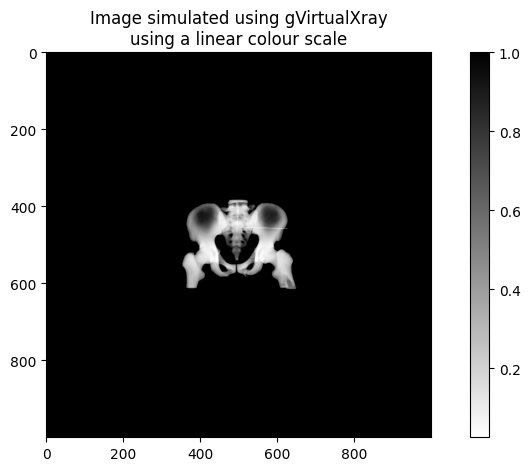

In [6]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(xrayImageFlipped, cmap="gray_r")
plt.colorbar(orientation='vertical')
plt.show()

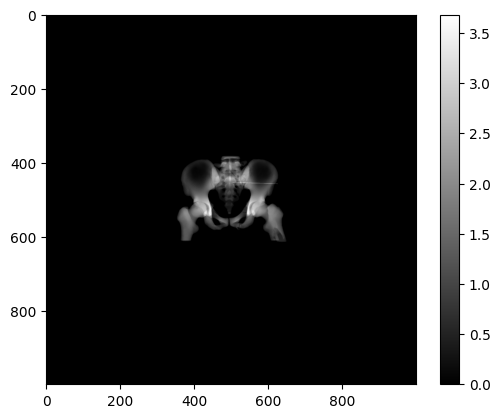

In [7]:
plt.imshow(-np.log(xrayImageFlipped), cmap="gray")
plt.colorbar()
plt.show()